In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data 


In [2]:
start = '2010-01-01'
end = '2019-01-01'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.429192
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,37.924175
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.678047
2018-12-28,39.630001,38.637501,39.375000,39.057499,169165600.0,37.697357
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.061707


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df. head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


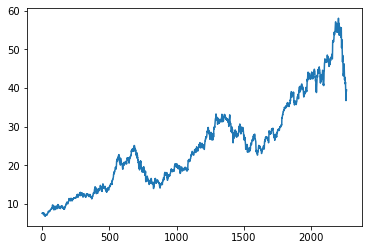

In [10]:
plt.plot(df.Close)

In [11]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2260,37.887501,36.647499,37.037498,36.707500,148676800.0
2261,39.307499,36.680000,37.075001,39.292500,234330000.0
2262,39.192501,37.517502,38.959999,39.037498,212468400.0
2263,39.630001,38.637501,39.375000,39.057499,169165600.0


In [13]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2260    51.285075
2261    51.159525
2262    51.029925
2263    50.897825
2264    50.774400
Name: Close, Length: 2265, dtype: float64

In [14]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2260    51.285075
2261    51.159525
2262    51.029925
2263    50.897825
2264    50.774400
Name: Close, Length: 2265, dtype: float64

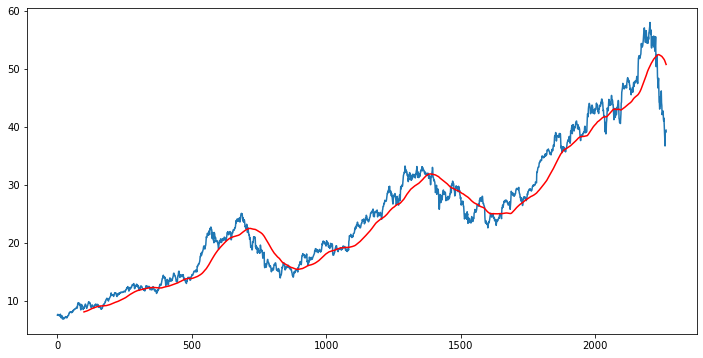

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2260    48.436525
2261    48.405838
2262    48.376063
2263    48.348300
2264    48.322163
Name: Close, Length: 2265, dtype: float64

In [18]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2260    48.436525
2261    48.405838
2262    48.376063
2263    48.348300
2264    48.322163
Name: Close, Length: 2265, dtype: float64

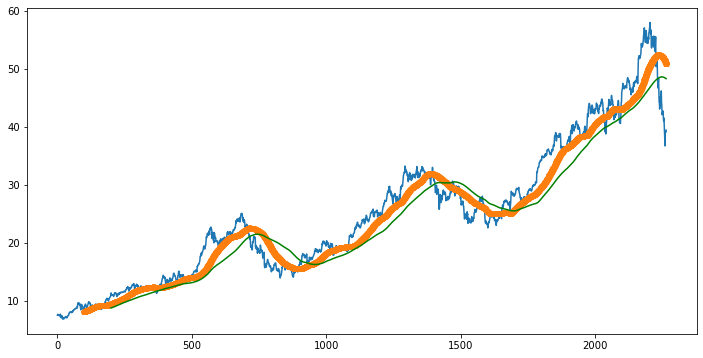

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'p')
plt.plot (ma200, 'g')

In [20]:
df.shape 

(2265, 5)

In [21]:
#Splitting Data into Traning and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(1585, 1)
(680, 1)


In [22]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [23]:
data_testing.head()

,Close
1585,26.782499
1586,26.492500
1587,26.420000
1588,26.270000
1589,26.087500


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.78070233],
       [0.7582516 ],
       [0.75285205]])

In [27]:
data_training_array.shape

(1585, 1)

In [ ]:
x_train = []
y_train = []
for i in range (100, data_training_array .shape[0]):
    x_train.append (data_training_array[i-100 :i])
    y_train.appned ( data_training_array[i , 0])
    
x_train, y_train = np.proxy(x_train), np.array(y_train) 

In [ ]:
x_train.shape

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential